In [35]:
%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt

In [36]:
import numpy as np

import pandas as pd

In [37]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [39]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [41]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [43]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [44]:
#Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

last_date = session.query(Measurement.date).\
order_by((Measurement.date).desc()).first()[0]
last_date 

prev_year = dt.date(year=2017, month=8, day=23)- dt.timedelta(days=365)
prev_year

# Perform a query to retrieve the date and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=prev_year).all()
results

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
df=df.sort_values('date')
df=pd.DataFrame(df.dropna())
df=df.reset_index(drop=True)
df

# Sort the dataframe by date

##Already done

# Use Pandas Plotting with Matplotlib to plot the data

# plt.xticks(rotation="45")
# plt.tight_layout()
# df.plot()


,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,1.79
2,2016-08-23,0.05
3,2016-08-23,0.15
4,2016-08-23,0.70
5,2016-08-23,0.02
6,2016-08-24,0.08
7,2016-08-24,2.15
8,2016-08-24,2.28
9,2016-08-24,1.45


![precipitation](Images/precipitation.png)

In [45]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [46]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()[0][0]

9

In [47]:
# What are the most active stations? (i.e. what stations have the most rows)?

# List the stations and the counts in descending order.

most_active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_station



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [48]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

high_low_avg = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                             filter(Measurement.station=="USC00519281").all()

high_low_avg



[(54.0, 85.0, 71.66378066378067)]

In [49]:
# Choose the station with the highest number of temperature observations.
highest = session.query(Measurement.station).filter(Measurement.tobs==func.max(Measurement.tobs).select()).first()
highest





('USC00519397')

In [50]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
lastyear = session.query(Measurement.date, Measurement.tobs,).filter(Measurement.station =="USC00519281").filter(Measurement.date <= '2017-08-23').\
        filter(Measurement.date >= '2016-08-23').all()

lastyear
# # lastyear = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date <= '2017-08-23').\
# #         filter(Measurement.date >= '2016-08-23').all()
# lastyear = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date <= '2017-08-23').\
#         filter(Measurement.date >= '2016-08-23').USC00519397.all()

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [51]:
lastyear_pd = pd.DataFrame(data=lastyear, columns=["date", "tobs"])
lastyear_pd = lastyear_pd.set_index('date', drop=True)
lastyear_pd.describe()


,tobs
count,352.000000
mean,73.107955
std,4.733315
min,59.000000
25%,70.000000
50%,74.000000
75%,77.000000
max,83.000000


In [52]:
tobs = lastyear_pd['tobs']
date = lastyear_pd.index.values


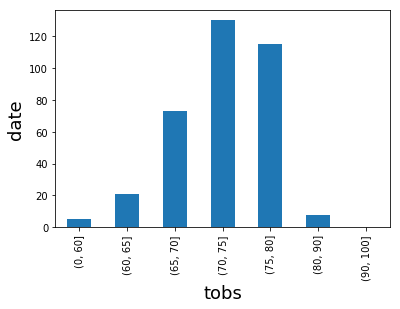

In [53]:
# Create the plot
plt.figure
x_axis = tobs
y_axis = date
plt.xlabel("tobs", fontsize=18)
plt.ylabel("date", fontsize=18)

bins = pd.cut(tobs, np.array([0,60,65,70,75,80, 90, 100]))
# print(bins)
bins.value_counts(sort=False).plot.bar()
# plot1 = plt.bar((x_axis, y_axis, color='steelblue', linewidth=5)
# plt.legend(labels=labels, loc='upper right', fontsize='large', frameon=True, edgecolor='black')
# plt.show() 


![precipitation](Images/station-histogram.png)

In [54]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 

# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-05-01', '2017-05-15'))

[(65.0, 75.23809523809524, 80.0)]


In [55]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 

# for your trip using the previous year's data for those same dates.

temps = calc_temps('2017-05-01', '2017-05-15')
temps_list = temps[0]
temps_list

temp_min = temps_list[0]
temp_avg = temps_list[1]
temp_max = temps_list[2]



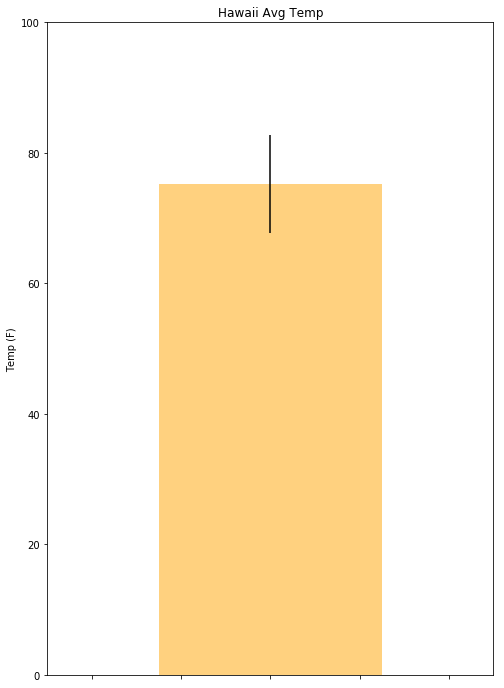

In [56]:

# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig,ax = plt.subplots(figsize=(8,12))
plt.bar(0, height=temp_avg, width=.25, yerr=.5*(temp_max-temp_min), alpha=.5, color='orange')
plt.ylabel('Temp (F)')
plt.title('Hawaii Avg Temp')
plt.ylim(0, 100)
plt.xlim(-.25,.25)
ax.set_xticklabels([])
plt.grid(False, axis="x")
plt.show()


In [66]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# results = session.query('SELECT station, name, latitude, longitude, elevation, SUM(prcp) FROM measurement JOIN station on(station)\
# WHERE (date>="2017-05-01", AND date<="2017-05-15") GROUP BY station ORDER BY SUM(prcp) DESC').all()

results = session.execute('SELECT measurement.station, name, latitude, longitude, elevation, SUM(prcp) FROM measurement JOIN station on(measurement.station = station.station)\
WHERE (date>="2017-05-01" AND date<="2017-05-15") GROUP BY measurement.station ORDER BY SUM(prcp) DESC').fetchall()

# results = session.execute('SELECT * FROM measurement').fetchall()
for result in results:
    print(result)


('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 4.510000000000001)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 3.2)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 2.2899999999999996)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 1.94)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.8700000000000001)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.32)


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip


# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
